# Question 1  

An article in the International Journal of Research in Marketing describes an experiment to test new ideas to increase credit card division of a financial servies compant. They want to improve the response rate to its credit card offers. They know from experience that the interest rates are an important factor in attracting potential customers, so they havedecided to focus on factors involving both interest rates and fees. They want to test changes in both introductory and long-term rates, as well as the effects of adding an account-opening fee and lower the annual fee. The factors tested in the experiment are as follows:

In [7]:
library(daewr)
run <- 1:16
A <- rep(c(-1, 1), 8)
B <- rep(c(-1, -1, 1, 1), 4)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 2)
D <- c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1)
y <- c(2.45, 3.36, 2.16, 2.29, 2.49, 3.39, 2.32, 2.44, 
       1.84, 2.24, 1.69, 1.87, 2.29, 2.92, 2.04, 2.03)
label <- c("(1)", "a", "b", "ab", "c", "ac", "bc", "abc", "d", "ad", "bd", "abd", "cd", "acd", "bcd", "abcd")
data <- data.frame(run, A, B, C, D, y, label)
data

run,A,B,C,D,y,label
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-1,-1,-1,-1,2.45,(1)
2,1,-1,-1,-1,3.36,a
3,-1,1,-1,-1,2.16,b
4,1,1,-1,-1,2.29,ab
5,-1,-1,1,-1,2.49,c
6,1,-1,1,-1,3.39,ac
7,-1,1,1,-1,2.32,bc
8,1,1,1,-1,2.44,abc
9,-1,-1,-1,1,1.84,d


where, 

| Factor | (-1) Control | (+1) New Idea |
| --- | --- | --- |
| A: Annual Fee | Current | Lower |
| B: Account-opening fee | No | Yes |
|C: Initial interest rate | Current | Lower |
|D: Long-term interest rate | Low | High |

**a)** Analyze the data and determine which factor is not significant.

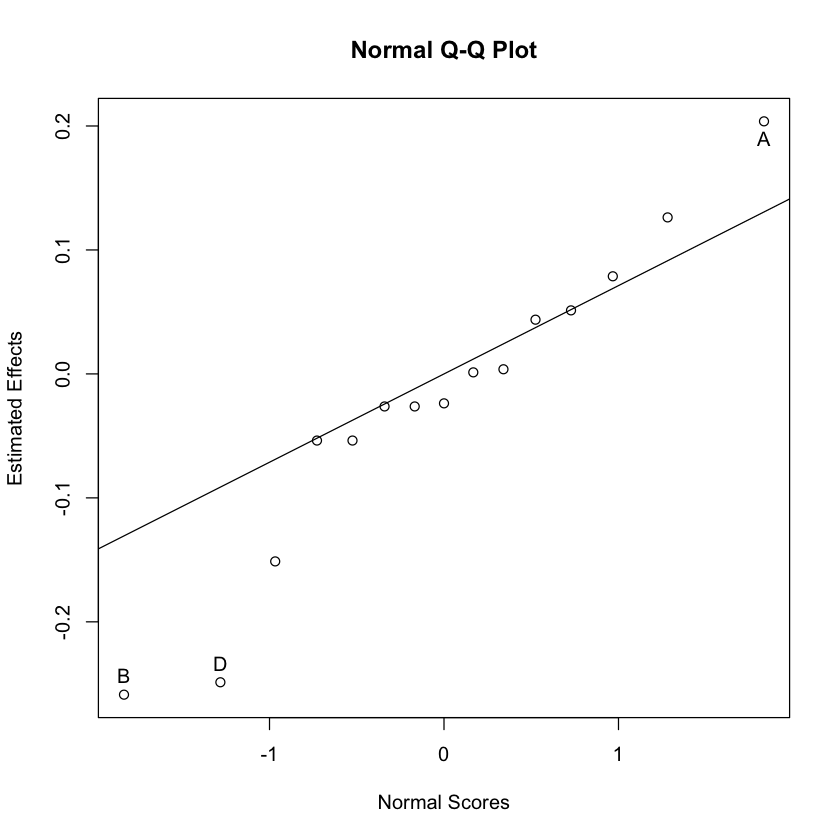

In [8]:
model <- lm(y ~ A*B*C*D, data = data)
fullnormal(coef(model)[-1], alpha = 0.05)

the factor "$C$" (Initial interset rate) is not significant.

**b)** Project the $2^4$ design into two replicates of a $2^3$ on the significant factors. The new design table should include the runs, factors, responses, and labels.

In [9]:
# Drop C and change the labels.
edit <- subset(data, select = -c(C,run))
edit$label <- gsub("c", "", edit$label)
edit$label[5] <- "(1)"
# Define new columns.
run <- 1:8
factorials <- edit[c(1:4, 9:12), 1:3]
I <- edit$y[c(1:4, 9:12)]
II <- edit$y[c(5:8, 13:16)]
sum <- I + II
labels <- edit$label[c(1:4, 9:12)]
# Create the new projected data frame:
projection <- data.frame(run, factorials, I, II,sum, labels)
rownames(projection) <- 1:8
projection

,run,A,B,D,I,II,sum,labels
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,-1,-1,-1,2.45,2.49,4.94,(1)
2,2,1,-1,-1,3.36,3.39,6.75,a
3,3,-1,1,-1,2.16,2.32,4.48,b
4,4,1,1,-1,2.29,2.44,4.73,ab
5,5,-1,-1,1,1.84,2.29,4.13,d
6,6,1,-1,1,2.24,2.92,5.16,ad
7,7,-1,1,1,1.69,2.04,3.73,bd
8,8,1,1,1,1.87,2.03,3.90,abd


**c)** In the projected design, what is the estimated effect of the account-opening fee in the response rate? 

The estimated effect is two times the regression coefficient.

In [10]:
# Calculate in 3 ways... 

# using the sum
model2 <- lm(sum ~ A*B*D, data = projection)
effect <- model2$coefficients
effect
# using like textbook
model3 <- lm(y ~ A*B*D, data = edit)
effects <- 2 * model3$coefficients
effects
# By hand
(3.90 + 4.73 -5.16 - 6.75 + 3.73 + 4.48 - 4.13 - 4.94) / 8

(Intercept)           A           B           D         A:B         A:D 
     4.7275      0.4075     -0.5175     -0.4975     -0.3025     -0.1075 
        B:D       A:B:D 
     0.1025      0.0875

(Intercept)           A           B           D         A:B         A:D 
     4.7275      0.4075     -0.5175     -0.4975     -0.3025     -0.1075 
        B:D       A:B:D 
     0.1025      0.0875

[1] -0.5175

From the analysis above we can conclude that the estimated effect of the account-opening fee (B) in the response rate is $-0.5175$.

**d)** Using the projected design, is the account-opening fee significant?

In [11]:
model3.aov <- aov(model3)
summary(model3.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
A            1 0.6642  0.6642  12.306 0.00798 **
B            1 1.0712  1.0712  19.847 0.00213 **
D            1 0.9900  0.9900  18.342 0.00268 **
A:B          1 0.3660  0.3660   6.781 0.03142 * 
A:D          1 0.0462  0.0462   0.856 0.38181   
B:D          1 0.0420  0.0420   0.779 0.40330   
A:B:D        1 0.0306  0.0306   0.567 0.47288   
Residuals    8 0.4318  0.0540                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The value $F = 19.847$ has a p-value of $0.00213 < 0.05$. Therefore we conclude there is strong evidence that the account-opening fee is significant.

**e)** Confound the projected design with blocks using the highest order interaction as a counfounding. Write down the runs for both blocks and estimate the block effect. What is the block effect really estimating in this Case?

In [12]:
# Display the runs and their associated block
Block <- c(1,2,2,1,2,1,1,2)
ABD <- c(-1, 1, 1, -1, 1, -1, -1, 1)
display <- data.frame(run, Block)
t(display)
# Estimate the Block effect
confound <- data.frame(Block, sum)
ybar_1 <- sum(confound$sum[confound$Block == 1]) /4
ybar_2 <- sum(confound$sum[confound$Block == 2]) /4  
block_effect <- ybar_1 - ybar_2
block_effect 

run,1,2,3,4,5,6,7,8
Block,1,2,2,1,2,1,1,2


[1] -0.175

The estimated block effect is $-0.175$. The block effect really estimates the effects of the Blocks + ABCD.